In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import venn
from itertools import combinations

In [2]:
corr = pd.read_csv('../open/train.csv')[['Y_Quality','Y_Class']]

[]

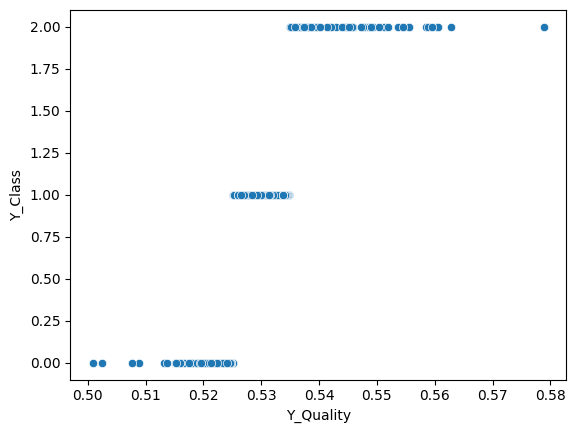

In [3]:
sns.scatterplot(corr, x='Y_Quality', y='Y_Class')
plt.plot()

In [4]:
df = pd.read_csv('../open/train.csv').drop(['Y_Class','Y_Quality','TIMESTAMP','Y_Quality'],axis=1).dropna(axis=1, how='all')

In [5]:
display(df.head())

,PRODUCT_ID,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
0,TRAIN_000,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,189.0,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN
1,TRAIN_001,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,185.6,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN
2,TRAIN_002,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,165.5,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN
3,TRAIN_003,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,165.8,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN
4,TRAIN_004,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,182.6,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN


In [6]:
desc = df.describe()
df = df.drop(desc.columns[desc.loc['std']==0], axis=1)

In [7]:
T05 = df[df['LINE']=='T010305'].dropna(axis=1, how='all').columns
T05 = set([int(x[2:]) for x in T05 if 'X_' in x])
T06 = df[df['LINE']=='T010306'].dropna(axis=1, how='all').columns
T06 = set([int(x[2:]) for x in T06 if 'X_' in x])
T04 = df[df['LINE']=='T050304'].dropna(axis=1, how='all').columns
T04 = set([int(x[2:]) for x in T04 if 'X_' in x])
T07 = df[df['LINE']=='T050307'].dropna(axis=1, how='all').columns
T07 = set([int(x[2:]) for x in T07 if 'X_' in x])
T14 = df[df['LINE']=='T100304'].dropna(axis=1, how='all').columns
T14 = set([int(x[2:]) for x in T14 if 'X_' in x])
T16 = df[df['LINE']=='T100306'].dropna(axis=1, how='all').columns
T16 = set([int(x[2:]) for x in T16 if 'X_' in x])

D:\conda\envs\quality\lib\site-packages\venn\_backwards_compatibility.py:16: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  "`get_labels()` is retained for backwards compatibility; " +
D:\conda\envs\quality\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
D:\conda\envs\quality\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\conda\envs\quality\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn2()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
D:\conda\envs\quality\lib\site-packages\ipykernel_launcher.py:

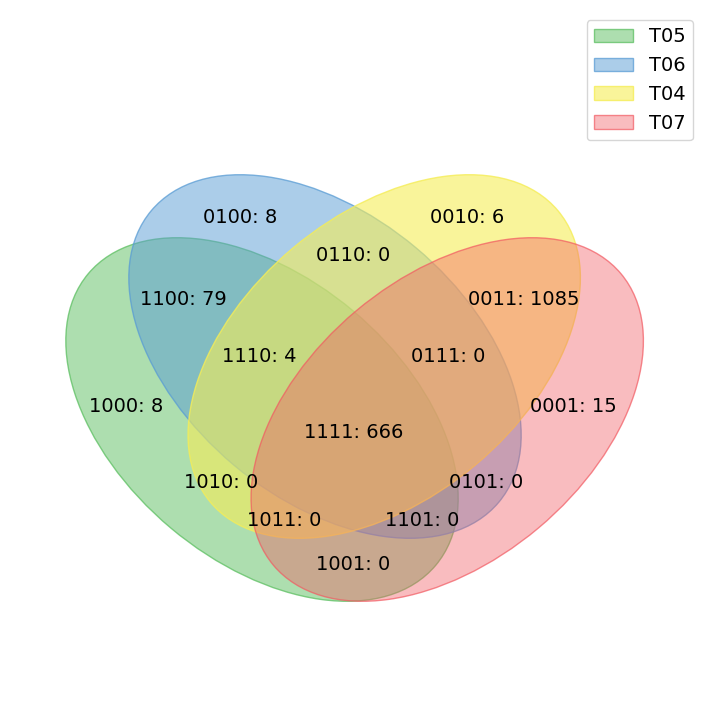

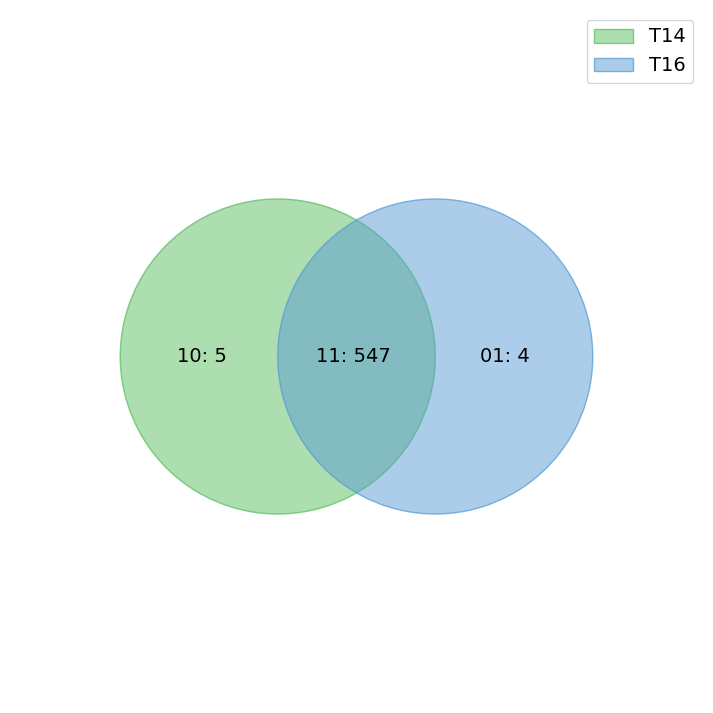

In [8]:
labels = venn.get_labels([T05,T06,T04,T07], fill=['number', 'logic'])
fig, ax = venn.venn4(labels, names=['T05', 'T06', 'T04', 'T07'])
fig.show()
labels = venn.get_labels([T14,T16], fill=['number', 'logic'])
fig, ax = venn.venn2(labels, names=['T14', 'T16'])
fig.show()

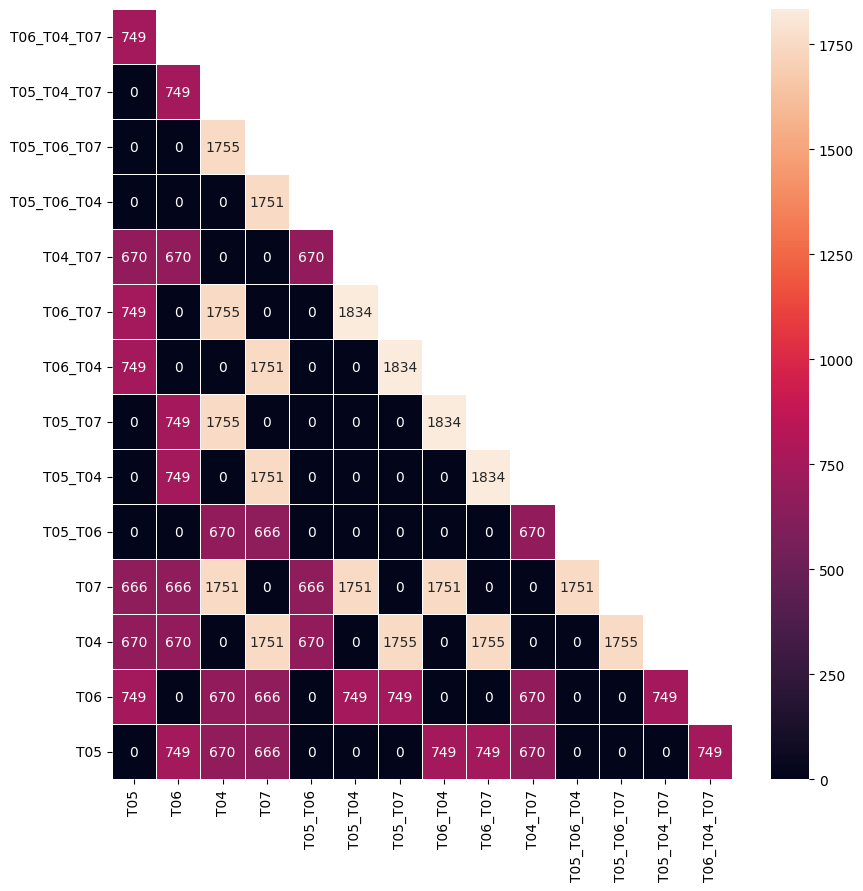

In [11]:
a_unis = {
    "T05":T05,
    "T06":T06,
    "T04":T04,
    "T07":T07
}

a_uni_keys = a_unis.keys()
columns = []
for i in range(len(a_unis)-1):
    for sample in list(combinations(a_uni_keys, i+1)):
        columns.append(('_').join(sample))
res = pd.DataFrame(columns=columns)

for col in columns:
    target = [x for x in a_uni_keys if x not in col.split('_')]
    for i in range(len(a_unis)-1):
        for sample in list(combinations(target, i+1)):
            comp = set()
            for s in sample:
                comp = comp|set(a_unis[s])
            comp = comp
            tmp = set()
            for c in col.split('_'):
                tmp = tmp|set(a_unis[c])
            tmp = tmp
            res.loc[col,('_').join(sample)]=len(tmp&comp)

mask = np.triu(np.ones_like(res, dtype=np.bool_))
mask = mask&(~np.array(np.eye(N=mask.shape[0]), dtype=np.bool_))
fig, ax = plt.subplots(figsize=(10,10))
res = res.fillna(0).astype(int)
ax = sns.heatmap(res.reindex(index=res.index[::-1]), mask=mask, annot=True, fmt='d', linewidths=0.5)
plt.show()